# SIMPLE SINGLE IRS SIMULATION

In [12]:
import matplotlib.pyplot as plt
import numpy as np 
import cmath
import random

from Functions import *

User positions:
 [[-279.71641684  277.97649818]
 [ 138.21694106  393.16026656]
 [ 303.62721613 -284.38118354]
 [  26.73192925 -198.38116633]
 [ 262.98074826 -383.59143746]
 [ 101.69233579 -101.59365114]
 [ 255.86097204 -359.06224647]
 [  20.39521135  447.82340944]
 [-357.91039644 -194.85496932]
 [ 261.23996109   -6.8830802 ]
 [ 215.22337991  208.51196007]
 [  72.53638305  -34.71109166]
 [-387.28539785  162.18010936]
 [-320.04135521  -36.99143683]
 [ 154.27143171  112.64432328]]

d_m:
 [[394.35036121 416.74802699 416.00738446 200.17413219 465.08199798
  143.74491682 440.89741875 448.28759818 407.51479845 261.33062213
  299.66371277  80.41384675 419.87184623 322.17205876 191.01941841]]
(1, 15)

d_rm:
 [[465.1148598  293.39697062 413.94470137 322.8410409  496.61386193
  207.30082152 471.11006308 371.18529792 587.29245164 154.26704696
  126.60542944 155.39527073 540.87148635 489.59731349  13.34631185]]
(1, 15)

d_i:
 [[180.27756377]]
(1, 1)

h_m:
 [[-3.09778472-0.41754742j  2.84011747-2.29

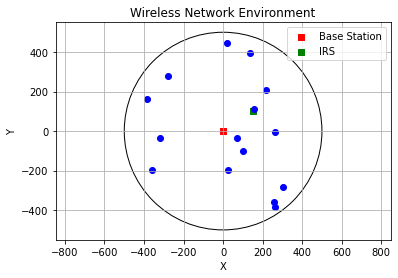

Link Budget: 
[-47.94561526 -47.4263601  -41.61315468 -45.5732998  -44.51135667
 -24.25747045 -44.17967957 -46.92746104 -49.97904087 -41.96258927
 -42.92848829 -22.11618978 -50.00915665 -60.93491459 -33.92411531]
(1, 15)

SNR of all users (in dB): 
[ 85.05438474  85.5736399   91.38684532  87.4267002   88.48864333
 108.74252955  88.82032043  86.07253896  83.02095913  91.03741073
  90.07151171 110.88381022  82.99084335  72.06508541  99.07588469]
(1, 15)

Rate of all users (in bps/Hz): 
[28.25445503 28.42694786 30.3580529  29.04252117 29.39529104 36.1234864
 29.50547178 28.59267854 27.57896567 30.24197324 29.92110853 36.83480444
 27.56896142 23.93950328 32.91229649]
(1, 15)

Outage probability for the simulated environment: 0.333


In [14]:
# Constants
GRID_RADIUS = 500
NUM_USERS_NEW = 15
BASE_STATION_POSITION = (0, 0)
TRANSMIT_POWER_WATTS = 2 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
BANDWIDTH = 50*(10**6) #in Hz
RATE_THRESHOLD = 28.5

IRS_POSITION = (150,100)
N = 10 #Number of IRS elements
PATH_LOSS_EXPONENT = 3.5 #path loss exponent (direct)
BETA = 2 #path loss exponent (indirect)
m = 1.0 #Shape for nakagami
omega = 1.0 #Param for nakagami

# threshold_min = 11.5
# threshold_max = 28.5

# Generate user positions
user_positions = generate_user_positions_2D(NUM_USERS_NEW, GRID_RADIUS)
print('User positions:'"\n", user_positions)
print()

# Generate base station positions
base_station_position = generate_station_positions_2D(BASE_STATION_POSITION)

# Generate IRS
irs_position = generate_IRS_2D(IRS_POSITION)

# Compute the distances from each user to the base station
d_m = compute_distances(user_positions, base_station_position)
d_m = d_m.reshape(1,NUM_USERS_NEW)
print('d_m:'"\n", d_m)
print(np.shape(d_m)) 
print()

# Compute the distances from each user to the IRS
d_rm = compute_distances(user_positions, irs_position)
d_rm = d_rm.reshape(1,NUM_USERS_NEW)
print('d_rm:'"\n", d_rm)
print(np.shape(d_rm)) 
print()

# Compute the distances from base_station to the IRS
d_i = compute_distances(base_station_position, irs_position)
d_i = d_i.reshape(-1, 1)
print('d_i:'"\n", d_i)
print(np.shape(d_i)) 
print()

# Generate the Rayleigh Fading Channel for each user
h_m = generate_rayleigh_fading_channel(NUM_USERS_NEW, FADING_STD_MEAN, FADING_STD_DEV)
h_m = h_m.reshape(1,-1)
print('h_m:'"\n", h_m)
print(np.shape(h_m))    
print()

f_m = []
fading = []
for user in range(NUM_USERS_NEW):
    fading.append(generate_nakagami_samples(m, omega, N))
f_m = np.array(fading)
f_m = f_m.reshape(N,NUM_USERS_NEW)
print('f_m:'"\n",f_m) 
print(np.shape(f_m))   
print()

f_m_transpose = np.transpose(f_m)
print('f_m_transpose:'"\n",f_m_transpose) 
print(np.shape(f_m_transpose))  
print()

# Generate the Nakagami Channel from base_station to the IRS (g)
g = generate_nakagami_samples(m, omega, N)
g = g.reshape(N,1)
print('g:'"\n", g) 
print(np.shape(g)) 
print()

# Initialize an empty list to store theta_n values for each i
theta_n_values_complex = []

for i in range(NUM_USERS_NEW):
    theta_n_i = []
    for j in range(N):
        theta_n = np.angle(h_m[0][i]) - (np.angle(f_m[j][i]) + np.angle(g[j][0]))
        theta_n_i.append(theta_n)
    theta_n_values_complex.append(1 * np.exp(1j * np.array(theta_n_i)))

theta_n_values_complex = np.array(theta_n_values_complex)
print('Theta_n matrix: ',"\n", theta_n_values_complex)
print(np.shape(theta_n_values_complex))
print()

# Initialize an empty list to store diagonal matrices
diagonal_matrices = []

# Transform each row into a diagonal matrix
for row in theta_n_values_complex:
    diagonal_matrix = np.diag(row[:N])
    diagonal_matrices.append(diagonal_matrix)

# Convert diagonal_matrices to a NumPy array
diagonal_matrices = np.array(diagonal_matrices)
# print('Diagonal matrix: '"\n", (diagonal_matrices))
# print(np.shape(diagonal_matrices))
# print()

# Initialize an empty list to store the results for each column
results_list = []

# Loop over each row/user in the diagonal_matrices
for row_index in range(diagonal_matrices.shape[0]):
    # Get the corresponding diagonal matrix for the current row/user
    single_row_diag = diagonal_matrices[row_index, :, :]
    # print(single_row_diag)

    # Extract the single column from f_m_transpose using indexing and transpose
    single_row = f_m_transpose[row_index,:]
    
    # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
    result_inter = np.dot(single_row, single_row_diag)

    # Perform the final matrix multiplication of the result_inter (5, 10) and g (10, 1)
    result = np.dot(result_inter, g)
    results_list.append(result)

# Convert the list of results into a numpy array
results_array = np.array(results_list)
print('Results array: '"\n", results_array)
print
print('Shape of results array:', results_array.shape) 
print()
results_array = results_array.reshape(1,NUM_USERS_NEW)

link_inter = []

for i in range(NUM_USERS_NEW):
    link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_m[0][i])/(np.sqrt(d_m[0][i]))**PATH_LOSS_EXPONENT + (results_array[0][i])/((d_rm[0][i])**BETA * (d_i)**BETA)))
    link_inter.append(link_inter_value)  # Append the computed value to the list

# Convert the list to a numpy array
link_inter = np.array(np.abs(link_inter))
link_inter_array = link_inter.reshape(1,NUM_USERS_NEW)

# Calculate link_budget using the updated link_inter array
link_budget = 10 * np.log10((link_inter_array)**2) + 30 
link_budget = link_budget.reshape(1,NUM_USERS_NEW)

#Calculate the noise value
noise = -133 # in dBm

SNR_matrix = []

# Calculate SNR
for i in range(NUM_USERS_NEW):
    SNR = compute_SNR(link_budget[0][i], noise)
    SNR_matrix.append(SNR)

SNR_matrix = np.array(SNR_matrix)
SNR_matrix = SNR_matrix.reshape(1,NUM_USERS_NEW)

# Calculate rate 
rate_matrix = compute_rate(SNR_matrix)

outage_probability = 0.0
# # Compute the outage probability
outage_probability = compute_outage_probability(NUM_USERS_NEW, rate_matrix.flatten(), RATE_THRESHOLD)
# Plot the grid, base station, and user positions
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), GRID_RADIUS, edgecolor='black', facecolor='none')
ax.add_patch(circle)
plt.scatter(0, 0, color='red', marker='s', label='Base Station')
plt.scatter(IRS_POSITION[0], IRS_POSITION[1], color='green', marker='s', label='IRS')
plt.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wireless Network Environment')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Print link budget values
print('Link Budget: ') 
for element in link_budget:
    print(element)
print(np.shape(link_budget)) 
print() 

# Print SNR values
print('SNR of all users (in dB): ')
for element in SNR_matrix:
    print(element)
print(np.shape(SNR_matrix)) 
print() 

# Print rate values
print('Rate of all users (in bps/Hz): ')
for element in rate_matrix:
    print(element)
print(np.shape(rate_matrix)) 

print()
print('Outage probability for the simulated environment: '"{:.3f}".format(outage_probability))

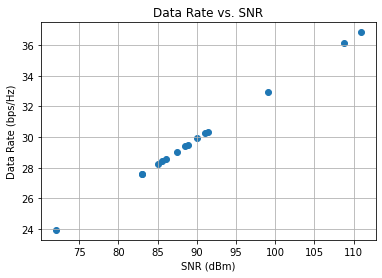

In [15]:
plt.scatter(SNR_matrix, rate_matrix)
plt.xlabel('SNR (dBm)')
plt.ylabel('Data Rate (bps/Hz)')
plt.title('Data Rate vs. SNR')
plt.grid(True)
plt.show()

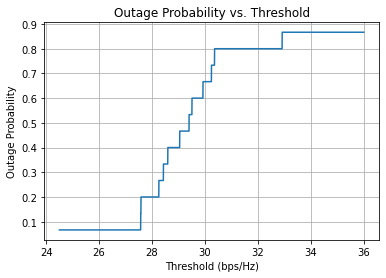

In [16]:
# Assuming you have an array 'threshold' containing the threshold values
threshold = np.arange(24.5,36, 0.001)

outage_probability = np.zeros(len(threshold))

# Calculating the outage probability for each threshold
for i in range(len(threshold)):
    outage_probability[i] = np.mean(rate_matrix.flatten() <= threshold[i])

# Plotting the outage probability vs. threshold
plt.plot(threshold, outage_probability)
plt.xlabel('Threshold (bps/Hz)')
plt.ylabel('Outage Probability')
plt.title('Outage Probability vs. Threshold')
plt.grid(True)
plt.show()

# BASIC SETUP FOR 100 SIMULATIONS FOR SINGLE CELL (WITH & WITHOUT IRS)

d_m:
 [[283.16332697 314.91401814 361.41577322 226.99690997 198.03318965
  250.75313704 180.50010938 294.66366216 238.95430069 437.66881141]]
(1, 10)

d_rm:
 [[241.57676593 343.47867321 379.01700326 264.55372828 168.28793416
  241.19846236 138.35901473 336.96567293 201.59762029 395.27602807]]
(1, 10)

d_i:
 [[42.42640687]]
(1, 1)



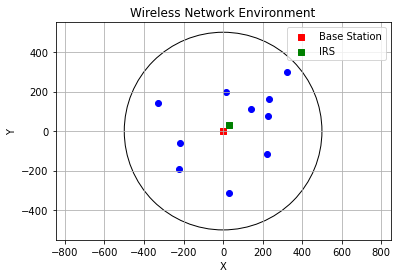

In [18]:
# Constants
GRID_RADIUS = 500
NUM_USERS_NEW = 10
BASE_STATION_POSITION = (0, 0)
TRANSMIT_POWER_WATTS = 2 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
BANDWIDTH = 50*(10**6) #in Hz
RATE_THRESHOLD = 28.5

IRS_POSITION = (30,30)
N = 10 #Number of IRS elements
PATH_LOSS_EXPONENT = 3.5 #path loss exponent (direct)
BETA = 2 #path loss exponent (indirect)
m = 1.0 #Shape for nakagami
omega = 1.0 #Param for nakagami

# threshold_min = 11.5
# threshold_max = 28.5

# Generate user positions
user_positions = generate_user_positions_2D(NUM_USERS_NEW, GRID_RADIUS)

# Generate base station positions
base_station_position = generate_station_positions_2D(BASE_STATION_POSITION)

# Generate IRS
irs_position = generate_IRS_2D(IRS_POSITION)

# Compute the distances from each user to the base station
d_m = compute_distances(user_positions, base_station_position)
d_m = d_m.reshape(1,NUM_USERS_NEW)
print('d_m:'"\n", d_m)
print(np.shape(d_m)) 
print()

# Compute the distances from each user to the IRS
d_rm = compute_distances(user_positions, irs_position)
d_rm = d_rm.reshape(1,NUM_USERS_NEW)
print('d_rm:'"\n", d_rm)
print(np.shape(d_rm)) 
print()

# Compute the distances from base_station to the IRS
d_i = compute_distances(base_station_position, irs_position)
d_i = d_i.reshape(-1, 1)
print('d_i:'"\n", d_i)
print(np.shape(d_i)) 
print()

# Plot the grid, base station, and user positions
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), GRID_RADIUS, edgecolor='black', facecolor='none')
ax.add_patch(circle)
plt.scatter(0, 0, color='red', marker='s', label='Base Station')
plt.scatter(IRS_POSITION[0], IRS_POSITION[1], color='green', marker='s', label='IRS')
plt.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wireless Network Environment')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# 100 SIMULATIONS FOR SINGLE CELL (W/O IRS)

In [19]:
NUM_SIMULATIONS = 50

# Initialize list to store individual outage probabilities
outage_probabilities_1 = []

# Perform simulations
for i in range(NUM_SIMULATIONS):
    
    # Generate the Rayleigh Fading Channel for each user to the base station
    rayleigh_channel = generate_rayleigh_fading_channel(NUM_USERS_NEW, FADING_STD_MEAN, FADING_STD_DEV)
    
    # Calculate link budget
    link_budget_1 = calc_link_budget(rayleigh_channel, d_m.flatten(), PATH_LOSS_EXPONENT, TRANSMIT_POWER_WATTS)
    
    # Calculate SNR
    SNR_1 = compute_SNR(link_budget_1, noise)

    # Calculate rate 
    rate = compute_rate(SNR_1)
    
    # Compute outage probability at each iteration
    outage_probability_1 = compute_outage_probability(NUM_USERS_NEW, rate, RATE_THRESHOLD)
    outage_probabilities_1.append(outage_probability_1)
    
# Compute average outage probability
average_outage_probability_1 = compute_average_outage_probability(outage_probabilities_1)
print()
print('Average Outage Probability (Only BS): ', "{:.3f}".format(average_outage_probability_1))


Average Outage Probability (Only BS):  0.214


# 100 SIMULATIONS FOR SINGLE CELL (WITH IRS)

In [20]:
# Initialize list to store individual outage probabilities
outage_probabilities_2 = []

#Performing for IRS
h_m = np.array(rayleigh_channel)
h_m = h_m.reshape(1,-1)

# Perform simulations
for i in range(NUM_SIMULATIONS):
    # Generate the Nakagami Channel from each user to the IRS (f_m)
    f_m = []
    fading = []
    for user in range(NUM_USERS_NEW):
        fading.append(generate_nakagami_samples(m, omega, N))
    f_m = np.array(fading)
    f_m = f_m.reshape(N,NUM_USERS_NEW)
    
    f_m_transpose = np.transpose(f_m)
    # Generate the Nakagami Channel from base_station to the IRS (g)
    g = generate_nakagami_samples(m, omega, N)
    g = g.reshape(N,1)
    
    # Initialize an empty list to store theta_n values for each i
    theta_n_values_complex = []
    
    for i in range(NUM_USERS_NEW):
        theta_n_i = []
        for j in range(N):
            theta_n = np.angle(h_m[0][i]) - (np.angle(f_m[j][i]) + np.angle(g[j][0]))
            theta_n_i.append(theta_n)
        theta_n_values_complex.append(1 * np.exp(1j * np.array(theta_n_i)))
    
    theta_n_values_complex = np.array(theta_n_values_complex)
    
    # Initialize an empty list to store diagonal matrices
    diagonal_matrices = []
    
    # Transform each row into a diagonal matrix
    for row in theta_n_values_complex:
        diagonal_matrix = np.diag(row[:N])
        diagonal_matrices.append(diagonal_matrix)
    
    # Convert diagonal_matrices to a NumPy array
    diagonal_matrices = np.array(diagonal_matrices)
    
    # Initialize an empty list to store the results for each column
    results_list = []
    
    # Loop over each row/user in the diagonal_matrices
    for row_index in range(diagonal_matrices.shape[0]):
        # Get the corresponding diagonal matrix for the current row/user
        single_row_diag = diagonal_matrices[row_index, :, :]
        # print(single_row_diag)
    
        # Extract the single column from f_m_transpose using indexing and transpose
        single_row = f_m_transpose[row_index,:]
        
        # Perform the dot product between f_m_transpose (5, 10) and the current diagonal matrix (10, 10)
        result_inter = np.dot(single_row, single_row_diag)
    
        # Perform the final matrix multiplication of the result_inter (5, 10) and g (10, 1)
        result = np.dot(result_inter, g)
        results_list.append(result)
    
    # Convert the list of results into a numpy array
    results_array = np.array(results_list)
    results_array = results_array.reshape(1,NUM_USERS_NEW)
    
    # Compute the interediate link budget (in watts) for each user in the system
    link_inter = []
    for j in range(NUM_USERS_NEW):
        link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_m[0][j])/(np.sqrt(d_m[0][j]))**PATH_LOSS_EXPONENT + (results_array[0][j])/((d_rm[0][j])**BETA * (d_i)**BETA)))
        link_inter.append(link_inter_value)  # Append the computed value to the list
        
    # Convert the list to a numpy array
    link_inter = np.array(np.abs(link_inter))
    link_inter_array = link_inter.reshape(1,NUM_USERS_NEW)
    
    # Calculate link_budget using the updated link_inter array
    link_budget = 10 * np.log10((link_inter_array)**2) + 30  # Need to add actual noise power
    link_budget = link_budget.reshape(1,NUM_USERS_NEW)
    
    #Calculate the noise value
    noise = -133 # in dBm
    
    SNR_matrix = []
    # Calculate SNR
    for k in range(NUM_USERS_NEW):
        SNR = compute_SNR(link_budget[0][k], noise)
        SNR_matrix.append(SNR)
    
    SNR_matrix = np.array(SNR_matrix)
    SNR_matrix = SNR_matrix.reshape(1,NUM_USERS_NEW)
    
    # Calculate rate 
    rate_matrix = compute_rate(SNR_matrix)
    rate_matrix_new = rate_matrix.flatten()
    
    # Compute outage probability at each iteration
    outage_probability_2 = compute_outage_probability(NUM_USERS_NEW, rate_matrix_new, RATE_THRESHOLD)
    outage_probabilities_2.append(outage_probability_2)
    # print('Outage probability for the simulation number', i+1, 'is', outage_probability)
    
# Compute average outage probability
average_outage_probability_2 = compute_average_outage_probability(outage_probabilities_2)
print()
print('Average Outage Probability (BS + IRS): ', "{:.3f}".format(average_outage_probability_2))


Average Outage Probability (BS + IRS):  0.100


# Changing the RIS position within the cell and plotting the outage probability

In [13]:
# Constants
GRID_RADIUS = 500
NUM_USERS_NEW = 30
BASE_STATION_POSITION = (0, 0)
TRANSMIT_POWER_WATTS = 2 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
BANDWIDTH = 50*(10**6) #in Hz
RATE_THRESHOLD = 30

#IRS_POSITION = (20,20)
N = 10 #Number of IRS elements
PATH_LOSS_EXPONENT = 3.5 #path loss exponent (direct)
BETA = 2 #path loss exponent (indirect)
m = 1.0 #Shape for nakagami
omega = 1.0 #Param for nakagami

# Generate user positions
user_positions = generate_user_positions(NUM_USERS_NEW, GRID_RADIUS)

# Generate base station positions
base_station_position = generate_station_positions(BASE_STATION_POSITION)

# Compute the distances from each user to the base station
d_m = compute_distances(user_positions, base_station_position)
d_m = d_m.reshape(1,NUM_USERS_NEW)
print('d_m:'"\n", d_m)
print(np.shape(d_m)) 
print()

d_m:
 [[441.50773113 202.3333294  356.19261252 460.97335306 434.70015698
  454.01410216 223.47136805 342.56103995 270.18673901 145.43453178
  256.58468347  57.60452025 491.01192141 463.20660751 343.03310964
  364.31972875 418.6595377  261.16296419 442.24289603 445.60847824
  216.36688101 179.1997877  247.60849222 204.93908678 311.289722
  446.11750454 367.43513404 443.31973547 435.67456917 449.69008196]]
(1, 30)



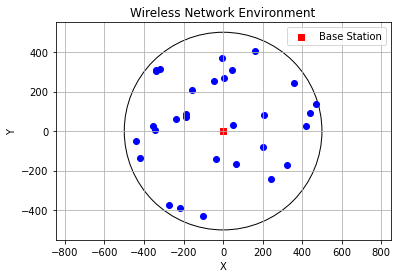

In [14]:
# Plot the grid, base station, and user positions
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), GRID_RADIUS, edgecolor='black', facecolor='none')
ax.add_patch(circle)
plt.scatter(0, 0, color='red', marker='s', label='Base Station')
#plt.scatter(IRS_POSITION[0], IRS_POSITION[1], color='green', marker='s', label='IRS')
plt.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wireless Network Environment')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

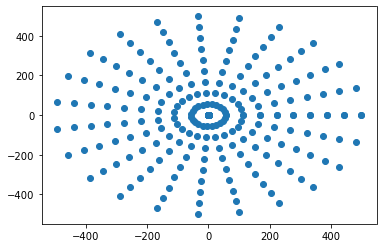

In [15]:
IRS_positions = 10  #50x24
IRS_Angles = 24

# Generate random points within the circle
radii = np.linspace(1, GRID_RADIUS, IRS_positions)
angles = np.linspace(0, 2 * np.pi, IRS_Angles)

R, A = np.meshgrid(radii,angles)

# Calculate the x and y coordinates using polar to Cartesian conversion
x_coords = R * np.cos(A)
y_coords = R * np.sin(A)

# Create a list of coordinate pairs in meters
circle_points = list(zip(x_coords.flatten().tolist(), y_coords.flatten().tolist()))

# print(circle_points)
# print(len(circle_points))
plt.scatter(x_coords, y_coords)

In [16]:
Outage_at_diff_pos = []
NUM_SIMULATIONS = 100


for pos in range(IRS_positions*IRS_Angles):
    # Generate IRS
    irs_position = circle_points[pos]

    # Compute the distances from each user to the IRS
    d_rm = compute_distances(user_positions, irs_position)
    d_rm = d_rm.reshape(1,NUM_USERS_NEW)
    #print('d_rm:'"\n", d_rm)
    #print(np.shape(d_rm)) 
    #print()

    # Compute the distances from base_station to the IRS
    d_i = compute_distances(base_station_position, irs_position)
    d_i = d_i.reshape(-1, 1)
    #print('d_i:'"\n", d_i)
    #print(np.shape(d_i)) 
    #print()

    # Initialize list to store individual outage probabilities
    outage_probabilities_2 = []

    #Performing for IRS
    h_m = np.array(rayleigh_channel)
    h_m = h_m.reshape(1,-1)

    # Perform simulations
    for i in range(NUM_SIMULATIONS):
        # Generate the Nakagami Channel from each user to the IRS (f_m)
        f_m = []
        fading = []
        for user in range(NUM_USERS_NEW):
            fading.append(generate_nakagami_samples(m, omega, N))
        f_m = np.array(fading)
        
        f_m_transpose = np.transpose(f_m)
        # Generate the Nakagami Channel from base_station to the IRS (g)
        g = generate_nakagami_samples(m, omega, N)
        g = g.reshape(N,1)
        
        # Initialize an empty list to store the results for each column
        results_list = []
        
        # Loop over each column index
        for column_index in range(NUM_USERS_NEW):
            
            # Extract the single column from f_m_transpose using indexing and transpose
            single_column = f_m_transpose[:, column_index]
            single_column = single_column.reshape(1, N)  # Reshape to (1, N)
            
            # Perform element-wise multiplication of the single row with g
            result = np.dot(single_column, g)
            results_list.append(result)
            
        # Convert the list of results into a numpy array
        results_array = np.squeeze(results_list)
        results_array = results_array.reshape(1,NUM_USERS_NEW)
        
        # Determine the angle associated with each complex number in radians
        angles_radians = np.angle(results_array)
        
        # Compute the array that will nullify the angle/phase to give us the scalar value
        r = 1
        polar_results = r * np.exp(1j *-1*angles_radians)
        
        # Compute the product that will nullify the angle/phase to give us the scalar value
        product = polar_results * results_array
        product_numerator = product.real
        
        # Compute the interediate link budget (in watts) for each user in the system
        link_inter = []
        for j in range(NUM_USERS_NEW):
            link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_m[0][j])/(d_m[0][j])**PATH_LOSS_EXPONENT + (product_numerator[0][j])/((d_rm[0][j])**BETA * (d_i)**BETA)))
            link_inter.append(link_inter_value)  # Append the computed value to the list
            
        # Convert the list to a numpy array
        link_inter = np.array(link_inter)
        link_inter_array = link_inter.reshape(1,NUM_USERS_NEW)
        
        # Calculate link_budget using the updated link_inter array
        link_budget = 10 * np.log10(link_inter_array) + 30  # Need to add actual noise power
        link_budget = link_budget.reshape(1,NUM_USERS_NEW)
        
        #Calculate the noise value
        noise = -133 # in dBm
        
        SNR_matrix = []
        # Calculate SNR
        for k in range(NUM_USERS_NEW):
            SNR = compute_SNR(link_budget[0][k], noise)
            SNR_matrix.append(SNR)
        
        SNR_matrix = np.array(SNR_matrix)
        SNR_matrix = SNR_matrix.reshape(1,NUM_USERS_NEW)
        
        # Calculate rate 
        rate_matrix = compute_rate(SNR_matrix)
        rate_matrix_new = rate_matrix.flatten()
        
        # Compute outage probability at each iteration
        outage_probability_2 = compute_outage_probability(NUM_USERS_NEW, rate_matrix_new, RATE_THRESHOLD)
        outage_probabilities_2.append(outage_probability_2)
        # print('Outage probability for the simulation number', i+1, 'is', outage_probability)
        
    # Compute average outage probability
    average_outage_probability_2 = compute_average_outage_probability(outage_probabilities_2)
    Outage_at_diff_pos.append(average_outage_probability_2)

In [18]:
x_axis, y_axis = zip(*circle_points)
z_axis = np.array(Outage_at_diff_pos)
print(x_axis)
print(1)
print(y_axis)
print(1)
print(Outage_at_diff_pos)
print(len(z_axis))

(1.0, 56.44444444444444, 111.88888888888889, 167.33333333333331, 222.77777777777777, 278.22222222222223, 333.66666666666663, 389.1111111111111, 444.55555555555554, 500.0, 0.9629172873477994, 54.35133133029801, 107.73974537324821, 161.1281594161984, 214.51657345914862, 267.90498750209883, 321.293401545049, 374.6818155879992, 428.0702296309495, 481.4586436738997, 0.8544194045464886, 48.22722861217957, 95.60003781981267, 142.97284702744574, 190.34565623507885, 237.71846544271193, 285.091274650345, 332.4640838579781, 379.8368930656112, 427.20970227324426, 0.6825531432186541, 38.52633297278626, 76.37011280235386, 114.21389263192144, 152.05767246148906, 189.90145229105667, 227.74523212062422, 265.58901195019183, 303.43279177975944, 341.27657160932705, 0.4600650377311522, 25.96811546304726, 51.47616588836336, 76.98421631367945, 102.49226673899557, 128.0003171643117, 153.50836758962777, 179.01641801494387, 204.52446844026, 230.0325188655761, 0.20345601305263397, 11.483961625637562, 22.76446723

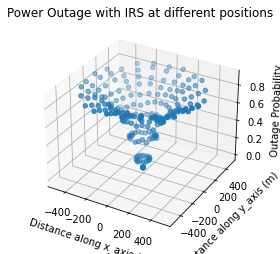

In [20]:
ax = plt.axes(projection = "3d")
ax.set_title("Power Outage with IRS at different positions")
ax.set_xlabel("Distance along x_axis (m)")
ax.set_ylabel("Distance along y_axis (m)")
ax.set_zlabel("Outage Probability")
ax.scatter(x_axis, y_axis, z_axis)